In [27]:
# Import packages
import pandas as pd
import random
from tqdm import tqdm
from gensim.models import Word2Vec

import matplotlib.pyplot as plt

import umap.umap_ as umap

In [4]:
data = pd.read_excel('Online_Retail.xlsx')

In [5]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [6]:
data = data.dropna()
data.StockCode = data.StockCode.astype('str')

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
customers = data.CustomerID.unique()
random.shuffle(customers)
customers_train = customers[range(round(0.9*(len(customers))))]

In [8]:
data_train = data[data.CustomerID.isin(customers_train)]
data_test = data[~data.CustomerID.isin(customers_train)]

In [9]:
data_train

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
purchase_train = list()

for ID in customers_train:
    temp = data_train[data_train.CustomerID==ID].StockCode.to_list()
    purchase_train.append(temp)

In [11]:
purchase_test = list()

for ID in data_test.CustomerID.unique():
    temp = data_test[data_test.CustomerID==ID].StockCode.to_list()
    purchase_test.append(temp)

In [12]:
model = Word2Vec(window=10,sg=1,hs=0,negative=10,alpha=0.03,min_alpha=0.0007,seed=14)
model.build_vocab(purchase_train,progress_per=200)
model.train(purchase_train, total_examples=model.corpus_count,epochs=10,report_delay=1)

model.init_sims(replace=True)

In [16]:
print(model)

Word2Vec(vocab=3158, size=100, alpha=0.03)


In [118]:
X = model[model.wv.vocab]

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [18]:
X.shape

(3158, 100)

In [24]:
dim_red_embedding = umap.UMAP(n_neighbors=30,n_components=2,min_dist=0.0,random_state=42).fit_transform(X)

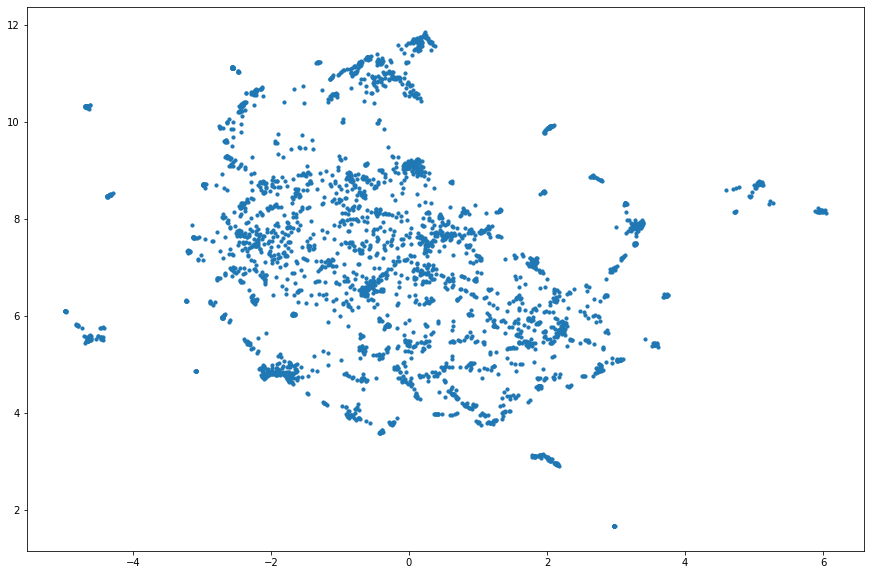

In [36]:
plt.figure(figsize=(15,10))
plt.scatter(dim_red_embedding[:,0],dim_red_embedding[:,1],s=10)

In [132]:
data_train_dict = data_train[['StockCode','Description']].drop_duplicates(subset='StockCode',keep='last').set_index('StockCode').to_dict()['Description']

# Test


### With Single product

In [133]:
data_train_dict['90019A']

'SILVER M.O.P ORBIT BRACELET'

In [134]:
def find_similar_prod(prod_vec):
    codes = [x[0] for x in  model.wv.similar_by_vector(prod_vec,topn=7)]
    return [data_train_dict.get(key) for key in codes]

In [135]:
find_similar_prod('90019A')

['PINK BOUDICCA LARGE BRACELET',
 'GREEN HEART OF GLASS BRACELET',
 'AMBER DROP EARRINGS W LONG BEADS',
 'ANT COPPER RED BOUDICCA BRACELET',
 'GREEN MURANO TWIST BRACELET',
 'PINK HEART OF GLASS BRACELET',
 'SILVER M.O.P. ORBIT NECKLACE']

### With Multiple product 

In [150]:
import numpy as np

In [174]:
product_codes = ['22632', '22355', '21495', '46000R', '46000S', '22731', '21258', '21041', '84920', '22173', '22953', '84508A', '22471', '21935',
 '21670', '20668', '21672', '22553', '22041', '20972', '22568', '22570', '22730', '20749', '22785', '22786', '85064']

In [178]:
def aggregate_vec(codes):
    code_vec = list()

    for code in codes:
        code_vec.append(model[code])

    return np.mean(code_vec,axis=0)

In [179]:
def find_similar_prod(codes):
    codes = [x[0] for x in  model.wv.similar_by_vector(aggregate_vec(codes),topn=7)]
    return [data_train_dict.get(key) for key in codes]

In [180]:
find_similar_prod(product_codes)

C:\Users\valiy\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


['POLYESTER FILLER PAD 65CMx65CM',
 'RECIPE BOX WITH METAL HEART',
 'FROG SOCK PUPPET',
 'WOVEN FROST CUSHION COVER',
 'FELTCRAFT CUSHION OWL',
 'LILAC GAUZE BUTTERFLY LAMPSHADE',
 'FELTCRAFT CUSHION RABBIT']